# ScisTree2 Tutorial

This tutorial includes three examples to help you get started with **ScisTree2**:

- **Example I**: Running ScisTree2 with your own **probabilistic genotype matrix** (with csv support).
- **Example II**: Running ScisTree2 with **raw read data** as input (with csv support).
- **Example III**: Running ScisTree2 with **VCF** as input.


---
### **Importing Required Packages**

Before running ScisTree2, make sure to import the required libraries:

In [1]:
# import libraries
import scistree2 as s2
import numpy as np 
import pandas as pd
from phytreeviz import TreeViz

## Inputs: Providing Genotype Probability for ScisTree2

ScisTree2 works with genotype probability data, which it accepts as a `scistree.probability.GenotypeProbability` object. You have several convenient methods to construct this essential object, each catering to different input data formats.

-----

### Method 1: Direct Probability Specification

If you've already calculated your genotype probabilities, you can input them directly using the `from_probs` method.

```python
scistree.probability.from_probs(probs, cell_names=None, site_names=None, margin=1e-5)
```

  * **`probs`**: A NumPy array containing the genotype probabilities.
  * **`cell_names` (Optional)**: A list of names for your cells. If you don't provide this, cells will be automatically named `c1`, `c2`, up to `cN`.
  * **`site_names` (Optional)**: A list of names for your genomic sites. If not provided, sites will be named `s1`, `s2`, up to `sN`.
  * **`margin`**: This parameter helps prevent probabilities from becoming either extremely large or extremely small, ensuring numerical stability.

**When to use this:** This method is ideal when you have precise genotype probabilities readily available, perhaps from another analysis pipeline or a simulation.

### Method 2: From Read Counts

For raw read count data, ScisTree2 can automatically convert these into genotype probabilities. This method includes crucial parameters to account for common experimental noise in sequencing data.

```python
scistree.probability.from_reads(reads, ado=0.2, seqerr=0.01, posterior=True, af=None, cell_names=None, site_names=None)
```

  * **`reads`**: A three-dimensional NumPy array containing the read counts for each cell at each site.
  * **`ado`**: The Allele Dropout (ADO) rate, which accounts for the probability of an allele not being detected in a cell.
  * **`seqerr`**: The sequencing error rate, representing the probability of a base being incorrectly called during sequencing.
  * **`posterior`**: If set to `True`, ScisTree2 will use `af` to calculate the posterior genotype probability. If `False`, `af` defaults to `0.5`.
  * **`af`**: The allele frequency.
  * **`cell_names` (Optional)**: A list of names for your cells. If you don't provide this, cells will be automatically named `c1`, `c2`, up to `cN`.
  * **`site_names` (Optional)**: A list of names for your genomic sites. If not provided, sites will be named `s1`, `s2`, up to `sN`.

**When to use this:** This is your go-to method when you have sequencing read depth information and need to infer genotype probabilities while accounting for common single-cell sequencing artifacts.


### Method 1: From CSV File
If you've already had a csv file containing probabilites or reads information, you can input it directly using the `from_csv` method.

```python
scistree.probability.from_csv(csv_filepath, source="probability", **kwargs)
```
  * **`csv_path`**: The path to your CSV file.
  * **`source`**: Be either "probability" or "read".
  * **`kwargs`**: Other parameters, such as `ado`, `seqerr`, etc.


### Method 3: From VCF File

ScisTree2 also supports direct input from Variant Call Format (VCF) files, a common format for storing genetic variation data.

```python
scistree.probability.from_vcf(vcf_path, ado=0.2, seqerr=0.01, posterior=True, af=None, key='AD')
```

  * **`vcf_path`**: The path to your VCF file.
  * **`ado`**: The Allele Dropout (ADO) rate, which accounts for the probability of an allele not being detected in a cell.
  * **`seqerr`**: The sequencing error rate, representing the probability of a base being incorrectly called during sequencing.
  * **`posterior`**: If set to `True`, ScisTree2 will use `af` to calculate the posterior genotype probability. If `False`, `af` defaults to `0.5`.
  * **`af`**: The allele frequency.
  * **`key`**: This is the specific tag within the VCF file that stores the read depth information.

  ------

### 🧬**Example I: Toy Genotype Probability Matrix**

In this example, we provide a small toy dataset where rows represent SNPs and columns represent cells.  
Each entry in the matrix denotes the probability of being the **wild type** (reference).

This format is suitable when you already have probabilistic genotypes derived from upstream processing.

*use 0.5 if you are uncertain.

We invoke **ScisTree2** with **SPR (Subtree Prune and Regraft)** local search on a small toy dataset consisting of 5 cells and 6 SNPs.

- **Rows** represent **SNPs**
- **Columns** represent **cells**
- Each entry contains the **probability of being wild type** (i.e., the reference allele)


|             | cell1 | cell2 | cell3 | cell4 | cell5 |
|:-----------:|:-----:|:-----:|:-----:|:-----:|:-----:|
| **snp1**    | 0.01  | 0.60  | 0.08  | 0.80  | 0.70  |
| **snp2**    | 0.80  | 0.02  | 0.70  | 0.01  | 0.30  |
| **snp3**    | 0.02  | 0.80  | 0.02  | 0.80  | 0.90  |
| **snp4**    | 0.90  | 0.90  | 0.80  | 0.80  | 0.02  |
| **snp5**    | 0.01  | 0.80  | 0.01  | 0.80  | 0.90  |
| **snp6**    | 0.05  | 0.02  | 0.70  | 0.05  | 0.90  |


In [2]:
# one can generate the input directly from the probability matrix.
probs = np.array([[0.01, 0.6, 0.08, 0.8, 0.7],
                 [0.8, 0.02, 0.7, 0.01, 0.3],
                 [0.02, 0.8, 0.02, 0.8, 0.9],
                 [0.9, 0.9, 0.8, 0.8, 0.02],
                 [0.01, 0.8, 0.01, 0.8, 0.9],
                 [0.05, 0.02, 0.7, 0.05, 0.9]]) 
cell_names = ['cell1', 'cell2', 'cell3', 'cell4', 'cell5']
site_names = ['snp1', 'snp2', 'snp3', 'snp4', 'snp5', 'snp6']
gp = s2.probability.from_probs(probs, cell_names, site_names)
print(gp)

      cell1  cell2  cell3  cell4  cell5
snp1   0.01   0.60   0.08   0.80   0.70
snp2   0.80   0.02   0.70   0.01   0.30
snp3   0.02   0.80   0.02   0.80   0.90
snp4   0.90   0.90   0.80   0.80   0.02
snp5   0.01   0.80   0.01   0.80   0.90
snp6   0.05   0.02   0.70   0.05   0.90


Or, simply from a `.csv` file. (if you have it)

In [3]:
# or get it from a .csv file
gp = s2.probability.from_csv('./data/toy_probs.csv')
print(gp)

      cell1  cell2  cell3  cell4  cell5
snp1   0.01   0.60   0.08   0.80   0.70
snp2   0.80   0.02   0.70   0.01   0.30
snp3   0.02   0.80   0.02   0.80   0.90
snp4   0.90   0.90   0.80   0.80   0.02
snp5   0.01   0.80   0.01   0.80   0.90
snp6   0.05   0.02   0.70   0.05   0.90


Next, we initialize a **ScisTree2** caller with **SPR local search** enabled and set the number of threads to 8.

After calling the `infer` method, ScisTree2 returns:
- The **inferred tree**
- The **imputed genotype** (pandas.DataFrame)
- The corresponding **log-likelihood** of the tree

To obtain the Newick string, you can either use `print(tree)` or `tree.output()`.

In [4]:
caller = s2.ScisTree2(threads=8) # use 8 threads
tree, imputed_genotype, likelihood = caller.infer(gp) # run Scistree2 inference
print('Imputed genotype from SPR: \n', imputed_genotype)
print('Newick of the SPR tree: ', tree)
print('Likelihood of the SPR tree: ', likelihood)

Imputed genotype from SPR: 
       cell1  cell2  cell3  cell4  cell5
snp1      1      0      1      0      0
snp2      0      1      0      1      0
snp3      1      0      1      0      0
snp4      0      0      0      0      1
snp5      1      0      1      0      0
snp6      1      1      1      1      0
Newick of the SPR tree:  (((cell1,cell3),(cell2,cell4)),cell5);
Likelihood of the SPR tree:  -6.271255186813891


We can also replace **SPR** (Subtree Prune and Regraft) local search with **NNI** (Nearest Neighbor Interchange) by setting `nni=True`.

> ℹ️**Note:** Using **NNI** typically **speeds up the algorithm** but may result in **lower accuracy** compared to **SPR**. NNI is recommended when a faster approximation is needed, especially for **large datasets**.


In [5]:
caller_nni = s2.ScisTree2(threads=8, nni=True)
tree_nni, imputed_genotype_nni, likelihood_nni = caller_nni.infer(gp)
print('Imputed genotype from NNI: \n', imputed_genotype_nni)
print('Newick of the NNI tree: ', tree_nni)
print('Likelihood of the NNI tree: ', likelihood_nni)

Imputed genotype from NNI: 
       cell1  cell2  cell3  cell4  cell5
snp1      1      0      1      0      0
snp2      0      1      0      1      0
snp3      1      0      1      0      0
snp4      0      0      0      0      1
snp5      1      0      1      0      0
snp6      1      1      1      1      0
Newick of the NNI tree:  (((cell1,cell3),(cell2,cell4)),cell5);
Likelihood of the NNI tree:  -6.271255186813891


We may also invoke **ScisTree2** with **Neighbor Joining (NJ)** by setting `nj=True` to obtain **only the initial tree**.

> ℹ️**Note:** In this toy example, **Neighbor Joining** performs quite well and produces a tree close to the optimal.


In [6]:
caller_nj = s2.ScisTree2(threads=8, nj=True)
tree_nj, imputed_genotype_nj, likelihood_nj = caller_nj.infer(gp)
print('Imputed genotype from NJ: \n', imputed_genotype_nj)
print('Newick of the NJ tree: ', tree_nj)
print('Likelihood of the NJ tree: ', likelihood_nj)

Imputed genotype from NJ: 
       cell1  cell2  cell3  cell4  cell5
snp1      1      0      1      0      0
snp2      0      1      0      1      0
snp3      1      0      1      0      0
snp4      0      0      0      0      1
snp5      1      0      1      0      0
snp6      1      1      1      1      0
Newick of the NJ tree:  (((cell1,cell3),(cell2,cell4)),cell5);
Likelihood of the NJ tree:  -6.271255186813891


We can also **evaluate a random or alternative tree** using the genotype probability matrix.  
Using the same example as before, we evaluate a random tree structure.

As expected, the **likelihood** of this alternative tree is **lower** than that of the optimal tree (−6.27).

In [7]:
random_tree = '(((cell2,cell3),(cell5,cell1)),cell4);'
imputed_genotype_random, likelihood_random = s2.evaluate(gp, random_tree)
# imputed_genotype_random, likelihood_random, tree = s2.evaluate(gp, random_tree, return_tree=True) # or return a tree
print('Imputed genotype from SPR: \n', imputed_genotype_random)
print('Newick of the random tree: ', random_tree)
print('Likelihood of the random tree: ', likelihood_random)

Imputed genotype from SPR: 
       cell1  cell2  cell3  cell4  cell5
snp1      1      1      1      0      1
snp2      1      1      1      1      1
snp3      1      1      1      0      1
snp4      0      0      0      0      1
snp5      1      1      1      0      1
snp6      1      1      1      1      1
Newick of the random tree:  (((cell2,cell3),(cell5,cell1)),cell4);
Likelihood of the random tree:  -18.274574970677588


ScisTree2 also provides functionality for **tree visualization**.

> ℹ️**Note:** ScisTree2 includes built-in support for visualizing **moderate-size** trees. For **very large trees**, it is recommended to use specialized external tools such as FigTree, iTOL, or ETE Toolkit.


In [8]:
tree.draw()

           ┌cell5
 0b6d07b4fb┤
           │                     ┌cell4
           │          ┌7e75613dd2┤
           │          │          └cell2
           └eeabe26f23┤
                      │          ┌cell3
                      └8833e231bd┤
                                 └cell1


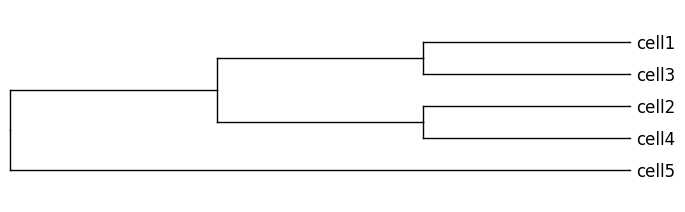

In [9]:
# one can also plot the tree using `phytreeviz`
tv = TreeViz(tree.output())
fig = tv.plotfig()

You can also find out where mutations are placed on the tree. The `node.mutations` attribute of a branch's ending node provides the mutation profile for that branch.

In [10]:
for node in tree.get_all_nodes():
    print(f'Mutations at branch ending at {tree[node].name}:', tree[node].mutations)

Mutations at branch ending at cell5: ['snp4']
Mutations at branch ending at eeabe26f23: ['snp6']
Mutations at branch ending at 7e75613dd2: ['snp2']
Mutations at branch ending at 8833e231bd: ['snp1', 'snp3', 'snp5']
Mutations at branch ending at cell4: []
Mutations at branch ending at cell2: []
Mutations at branch ending at cell3: []
Mutations at branch ending at cell1: []
Mutations at branch ending at 0b6d07b4fb: []


You can inject branch information into a Newick string by passing a custom function. This function extracts the desired data, such as the number of mutations, from each node and incorporates it into the string.

This allows you to represent the number of mutations as the branch length. With this Newick string, you can easily perform further analysis or visualization using other packages, for example, libraries like ete3 are well-suited for this purpose, although we won't cover that part here.

In [11]:
def get_num_mutations(node):
    return len(node.mutations)

print(tree.output(branch_length_func=get_num_mutations)) # Newick string format: branch lengths represent the number of mutations.

print(tree.output(branch_length_func=lambda x: len(x.mutations))) # or simply, using a lambda expression.

(((cell1:0,cell3:0):3,(cell2:0,cell4:0):1):1,cell5:1):0;
(((cell1:0,cell3:0):3,(cell2:0,cell4:0):1):1,cell5:1):0;


Bootstrapping is the most common method for assessing branch support, applicable to distance-based, parsimony, and maximum likelihood trees. It's a resampling technique that gauges how consistently the data supports each clade.
We can use Felsenstein's bootstrapping method to determine the tree's branch confidence.

In [12]:
tree = caller.bootstrap(tree, gp, num_bootstrap=100)
print(tree.output(branch_length_func=lambda x: x.branch_confidence))

(((cell1:1.0,cell3:1.0):0.94,(cell2:1.0,cell4:1.0):0.7):0.0,cell5:1.0):1.0;


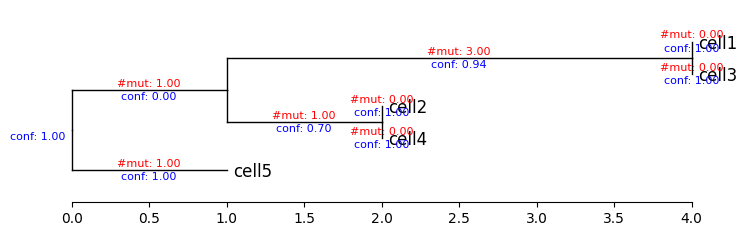

In [13]:
tv = TreeViz(tree.output(branch_length_func=lambda x: len(x.mutations), confidence_func=lambda x: x.branch_confidence))
tv.show_branch_length(color='red', label_formatter=lambda v: f"#mut: {v:.2f}")
tv.show_confidence(color='blue', label_formatter=lambda v: f"conf: {v:.2f}")
tv.show_scale_axis()
fig = tv.plotfig()

---
### 🧬 **Example II: Toy Raw Reads Data**

In this dataset, the input format remains a matrix of shape `(num_sites, num_cells)`.  
However, instead of using **precomputed genotype probabilities**, **each entry is a tuple** representing raw sequencing read counts.

*if the read counts are unknown, just use (0, 0).

Each tuple has the form: `(ref_count, alt_count)`, where:
- `ref_count` is the number of reads supporting the **reference (wild type)** allele
- `alt_count` is the number of reads supporting the **mutation (alternative)** allele

This format is suitable when you start from **raw read counts** rather than inferred genotype probabilities, enabling ScisTree2 to perform **probabilistic genotype modeling** internally before tree inference.


This dataset, located in the `data` folder, contains **50 cells** and **100 SNPs**.  
It was generated using [CellCoal](https://github.com/dapogon/cellcoal) with the following command:

```bash
cellcoal-1.2.0 -n5 -s10 -l100 -e1000 -b1 -j30 -p0 -D0.5 -B0 0.01 -C5 -E0 -otoys -y3 -v -1 -2 -6 -7 -9 -Y
```
Preview:

|            | Cell 1 | Cell 2 | Cell 3 | Cell 4 | Cell 5 | Cell 6 | Cell 7 | Cell 8 | Cell 9 | Cell 10 |
|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|---------|
| SNP 1      | (4,1)  | (4,0)  | (5,1)  | (4,0)  | (1,0)  | (4,0)  | (6,0)  | (6,0)  | (5,0)  | (5,0)   |
| SNP 2      | (4,0)  | (3,0)  | (7,1)  | (1,1)  | (3,0)  | (2,0)  | (10,0) | (11,0) | (1,0)  | (9,0)   |
| SNP 3      | (4,5)  | (11,0) | (4,0)  | (3,0)  | (4,0)  | (3,0)  | (7,0)  | (0,0)  | (2,0)  | (4,0)   |
| SNP 4      | (8,0)  | (2,0)  | (6,0)  | (1,0)  | (2,2)  | (3,5)  | (5,3)  | (1,3)  | (2,4)  | (8,0)   |
| SNP 5      | (5,0)  | (9,0)  | (4,0)  | (3,0)  | (4,0)  | (3,0)  | (7,0)  | (4,1)  | (4,0)  | (5,0)   |

> ℹ️ **Note**: Only the first 10 cells and 5 SNPs are shown here for illustration. The full dataset contains 100 SNPs × 50 cells.

> ℹ️ **Note**: Use (0, 0) if there is any missing.


We calculate the posterior genotype probability with the following settings:  
- Allelic dropout rate: `ado=0.2`  
- Sequencing error rate: `seqerr=0.01`  

When `posterior=True` (default), the posterior probability $p(G \mid D)$ is calculated given the allele frequency `af`.  
The parameter `af` should be a `numpy.ndarray` with shape (num_sites, 1).

If `af` is not provided or set to `None`, it will be automatically estimated from the current samples.

In [14]:
# one can generate the input directly from a reads matrix.
reads = np.load('data/toy_raw_reads.npy', allow_pickle=True) # load simulated reads
cell_names = [f'cell{i}' for i in range(50)]
site_names = [f'snp{i}' for i in range(100)]
gp = s2.probability.from_reads(reads, ado=0.2, seqerr=0.01, posterior=True, af=None, cell_names=cell_names, site_names=site_names)
print(gp.shape)

(100, 50)


Or, simply from a `.csv` file.

In [15]:
# or from a .csv file containing reads information by setting source = 'read'.
gp = s2.probability.from_csv('./data/toy_raw_reads.csv', source='read')

We then proceed to perform inference under three different modes as what we did in the first example.


In [16]:
# SPR local search
caller_spr = s2.ScisTree2(threads=8)
tree_spr, imputed_genotype_spr, likelihood_spr = caller_spr.infer(gp)
# NNI local search
caller_nni = s2.ScisTree2(nni=True, threads=8)
tree_nni, imputed_genotype_nni, likelihood_nni = caller_nni.infer(gp)
# NJ
caller_nj = s2.ScisTree2(nj=True)
tree_nj, imputed_genotype_nj, likelihood_nj = caller_nj.infer(gp)

ScisTree2 operates on a heuristic algorithm, which means its execution time can vary. For users who need to control runtime and potentially stop the program early, the `max_iter` parameter is available. By setting `max_iter`, you can define the maximum number of local search steps performed.

In [17]:
caller_early_stop = s2.ScisTree2(threads=8, max_iter=2)
tree_early_stop, imputed_genotype_early_stop, likelihood_early_stop = caller_early_stop.infer(gp)
print('likelihood after 2 iterations:', likelihood_early_stop)
print('the optimal likelihood:', likelihood_spr)

likelihood after 2 iterations: -1152.6682008798907
the optimal likelihood: -1146.3643724474396


Evaluate branch confidence

In [18]:
tree_spr_bootstrap = caller_spr.bootstrap(tree_spr, gp)
print(tree_spr_bootstrap.output(branch_length_func=lambda x: x.branch_confidence))

((((((((((((cell24:1.0,cell43:1.0):0.7,cell22:1.0):0.23,cell39:1.0):0.05,((cell15:1.0,cell46:1.0):0.1,cell40:1.0):0.06):0.12,((((cell49:1.0,cell5:1.0):0.18,cell28:1.0):0.18,cell3:1.0):0.16,(cell32:1.0,cell4:1.0):0.45):0.01):0.0,cell19:1.0):0.0,cell8:1.0):0.01,((((cell13:1.0,cell38:1.0):0.57,cell21:1.0):0.28,cell20:1.0):0.18,cell42:1.0):0.41):0.05,(((cell31:1.0,cell41:1.0):0.4,cell25:1.0):0.15,cell23:1.0):0.33):0.13,cell44:1.0):0.37,cell29:1.0):0.97,(((((((((cell16:1.0,cell17:1.0):0.16,(cell27:1.0,cell2:1.0):0.08):0.05,cell30:1.0):0.07,cell11:1.0):0.14,((cell14:1.0,cell26:1.0):0.45,cell47:1.0):0.25):0.27,cell48:1.0):0.16,((((cell36:1.0,cell9:1.0):0.44,cell1:1.0):0.13,cell6:1.0):0.1,((cell0:1.0,cell34:1.0):0.58,(cell33:1.0,cell45:1.0):0.57):0.42):0.05):0.0,((((cell10:1.0,cell12:1.0):0.53,cell37:1.0):0.83,cell35:1.0):0.55,cell18:1.0):0.61):0.29,cell7:1.0):1.0):1.0;


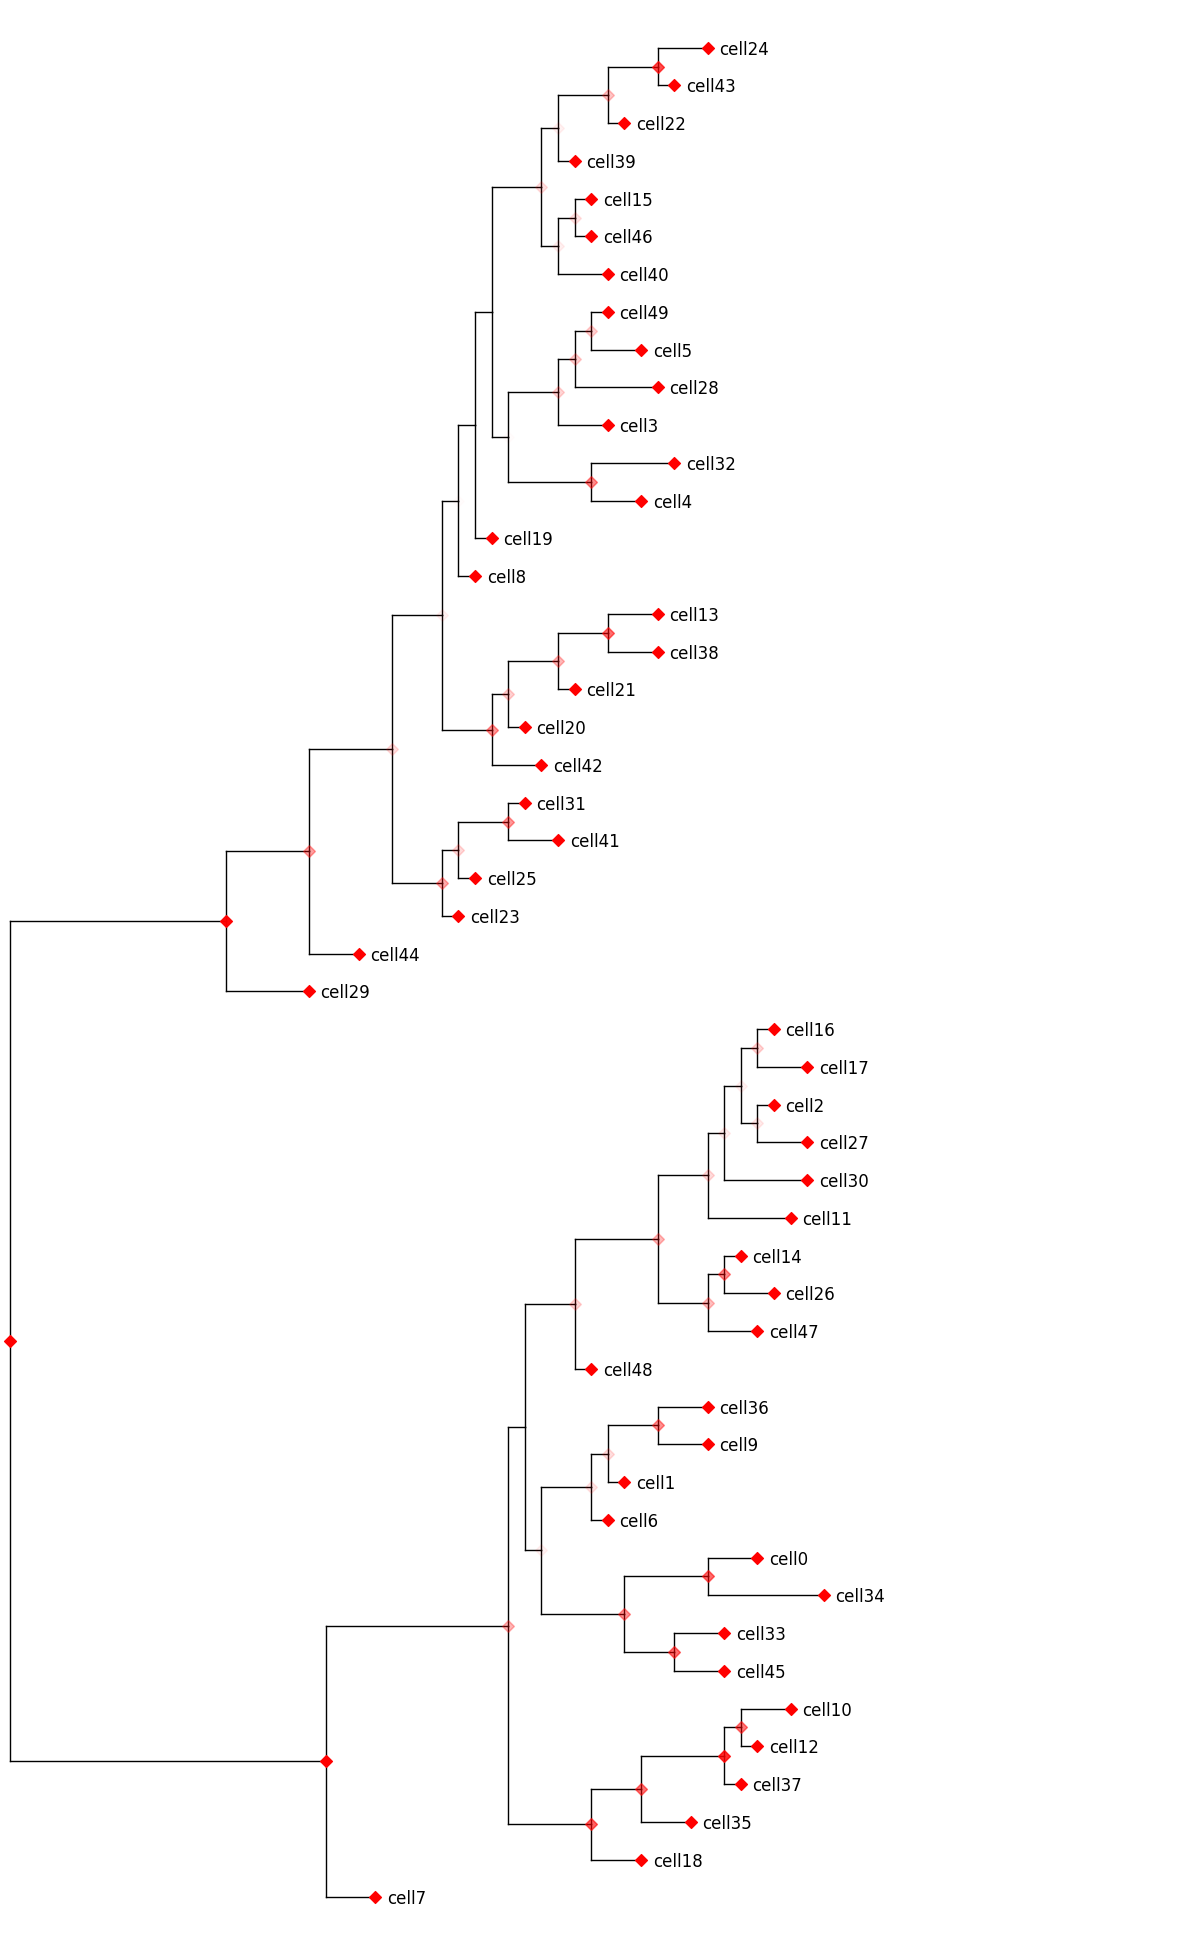

In [19]:
# add 0.5 to each branch to avoid 0 length.
tv = TreeViz(tree_spr_bootstrap.output(branch_length_func=lambda x: len(x.mutations)+0.5, confidence_func=lambda x: x.branch_confidence), width=15)
# tv.show_confidence(bbox=dict(facecolor='red', alpha=0.5))
for node in tree_spr_bootstrap.get_all_nodes():
    leaf_names = [leaf.name for leaf in tree_spr_bootstrap[node].get_leaves()]
    tv.marker(leaf_names, marker="D", color='red', alpha=tree_spr_bootstrap[node].branch_confidence)
fig = tv.plotfig()

### Evaluation Metrics

Our package provides several metrics to evaluate the results. These include:

- Genotype Accuracy:  
  `scistree2.metric.genotype_accuracy(true_genotype, genotype)`
- Tree Accuracy (defined as 1 minus the normalized Robinson-Foulds distance):  
  `scistree2.metric.tree_accuracy(true_tree, tree)`

- Ancestor-Descendant Error:  
  `scistree2.metric.ancestor_descendant_error(true_mutation, mutation)`

- Different Lineage Error:  
  `scistree2.metric.different_lineage_error(true_mutaiton, mutation)`

Usage examples are shown below:


In [20]:
# get groundtruth
true_genotype = np.loadtxt('data/true_genotype.txt') # load true genotype provided by CellCoal
with open('data/true_tree.nwk', 'r') as f: 
    true_tree_nwk = f.readline().strip() # load true tree provided by CellCoal
true_tree = s2.util.from_newick(true_tree_nwk)
print('Newick of true tree', true_tree)
print('True genotype', true_genotype.shape)

Newick of true tree (((((((((cell14,cell26),cell27),cell11),((cell16,cell47),cell2)),cell17),cell30),((((cell36,cell6),cell7),cell48),cell1)),(((((cell10,cell18),(cell12,cell37)),cell35),cell9),(((cell0,cell34),cell45),cell33))),(((((((cell15,cell29),cell44),cell8),((cell3,cell49),cell28)),(((cell13,cell38),(cell20,cell21)),cell42)),(((((cell23,cell31),cell22),cell41),(cell19,cell25)),(((cell24,cell43),cell39),((cell46,cell5),cell40)))),(cell32,cell4)));
True genotype (100, 50)


In [21]:
gacc_spr = s2.metric.genotype_accuarcy(true_genotype, imputed_genotype_spr.values)
gacc_nni = s2.metric.genotype_accuarcy(true_genotype, imputed_genotype_nni.values)
gacc_nj = s2.metric.genotype_accuarcy(true_genotype, imputed_genotype_nj.values)

tacc_spr = s2.metric.tree_accuracy(true_tree, tree_spr)
tacc_nni = s2.metric.tree_accuracy(true_tree, tree_nni)
tacc_nj = s2.metric.tree_accuracy(true_tree, tree_nj)

mutation_true = s2.metric.get_ancestor_descendant_pairs(true_genotype)
mutations_spr = s2.metric.get_ancestor_descendant_pairs(imputed_genotype_spr.values)
mutations_nni = s2.metric.get_ancestor_descendant_pairs(imputed_genotype_nni.values)
mutations_nj = s2.metric.get_ancestor_descendant_pairs(imputed_genotype_nj.values)
ad_err_spr = s2.metric.ancestor_descendant_error(mutation_true, mutations_spr)
ad_err_nni = s2.metric.ancestor_descendant_error(mutation_true, mutations_nni)
ad_err_nj = s2.metric.ancestor_descendant_error(mutation_true, mutations_nj)
dl_err_spr = s2.metric.different_lineage_error(mutation_true, mutations_spr)
dl_err_nni = s2.metric.different_lineage_error(mutation_true, mutations_nni)
dl_err_nj = s2.metric.different_lineage_error(mutation_true, mutations_nj)

metrics = {
    "Method": ["SPR", "NNI", "NJ"],
    "Genotype Accuracy": [gacc_spr, gacc_nni, gacc_nj],
    "Tree Accuracy": [tacc_spr, tacc_nni, tacc_nj],
    "Ancestor-Descendant Error": [ad_err_spr, ad_err_nni, ad_err_nj],
    "Different Lineage Error": [dl_err_spr, dl_err_nni, dl_err_nj]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)
df_metrics

,Method,Genotype Accuracy,Tree Accuracy,Ancestor-Descendant Error,Different Lineage Error
0,SPR,0.9826,0.250000,0.479858,0.023928
1,NNI,0.9802,0.166667,0.478591,0.024925
2,NJ,0.9766,0.083333,0.503420,0.024925


----
### 🧬 **Example III: From VCF File (reads)**

In this example, we'll demonstrate how to start directly from a VCF (Variant Call Format) file. This approach is ideal if you already have a VCF file generated by other software, provided it contains the necessary read count information.


In [22]:
vcf_path = './data/example.vcf'
gp = s2.probability.from_vcf(vcf_path, ado=0.2, seqerr=0.01, posterior=True, af=None)
print(gp)

Info: Skipping line because AD not found in FORMAT: CHR[chr1], POS[250]
          CELL_1  CELL_2  CELL_3  CELL_4  CELL_5
chr1:100    0.00    0.88    0.00    0.00    0.88
chr1:150    0.95    0.00    0.50    0.95    0.00
chr1:200    0.00    0.00    0.77    0.00    0.00


In [23]:
# SPR local search
caller_vcf = s2.ScisTree2(threads=8)
tree_vcf, imputed_genotype_vcf, likelihood_vcf = caller_vcf.infer(gp)
print('Imputed genotype from SPR: \n', imputed_genotype_vcf)
print('Newick of the SPR tree: ', tree_vcf)
print('Likelihood of the NJ tree: ', likelihood_vcf)

Imputed genotype from SPR: 
           CELL_1  CELL_2  CELL_3  CELL_4  CELL_5
chr1:100       1       0       1       1       0
chr1:150       0       1       0       0       1
chr1:200       1       1       1       1       1
Newick of the SPR tree:  (((CELL_1,CELL_4),CELL_3),(CELL_2,CELL_5));
Likelihood of the NJ tree:  -2.50748619740126
